In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

In [29]:
#load the credit card fraud prediction data , source : Kaggle
df = pd.read_csv("/Users/pradyumna/pradyapps/bits/3rd-sem/data-science/assignment1/creditcard-fraud-data.csv")
df.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10000 non-null  int64  
 1   trans_date_trans_time  10000 non-null  object 
 2   cc_num                 10000 non-null  float64
 3   merchant               10000 non-null  object 
 4   category               10000 non-null  object 
 5   amt                    10000 non-null  float64
 6   first                  10000 non-null  object 
 7   last                   10000 non-null  object 
 8   gender                 10000 non-null  object 
 9   street                 10000 non-null  object 
 10  city                   10000 non-null  object 
 11  state                  10000 non-null  object 
 12  zip                    10000 non-null  int64  
 13  lat                    10000 non-null  float64
 14  long                   10000 non-null  float64
 15  cit

In [8]:
#Print count of rows and columns
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 10000 rows and 23 columns


In [124]:
# Print column names
print(df.columns.tolist())

['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [9]:
# Get data types of columns
column_types = df.dtypes

print(column_types)

id                         int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [10]:
#Get unique values for each of the attributes
# Iterate over each column
for column in df.columns:
    # Get unique values for the current column
    unique_values = df[column].unique()
    print(f"Unique values for column {column}: {unique_values}")

Unique values for column id: [   0    1    2 ... 9997 9998 9999]
Unique values for column trans_date_trans_time: ['21/06/2020 12:14' '21/06/2020 12:15' '21/06/2020 12:16' ...
 '23/06/2020 23:56' '23/06/2020 23:57' '23/06/2020 23:58']
Unique values for column cc_num: [2.29116000e+15 3.57303000e+15 3.59822000e+15 3.59192000e+15
 3.52683000e+15 3.04077000e+13 2.13181000e+14 3.58929000e+15
 3.59636000e+15 3.54690000e+15 2.24254000e+15 5.71465000e+11
 6.59325000e+15 4.98830000e+12 6.01150000e+15 4.57064000e+15
 4.90663000e+18 4.90885000e+15 4.86131000e+18 6.53844000e+15
 2.28374000e+15 4.56000000e+18 4.56283000e+12 2.13153000e+14
 3.72509000e+14 6.01115000e+15 6.01192000e+15 3.57766000e+15
 3.50238000e+15 1.80040000e+14 3.79897000e+14 1.80048000e+14
 4.30248000e+15 1.80036000e+14 1.80065000e+14 6.51722000e+15
 4.68352000e+15 5.01899000e+11 6.01135000e+15 2.13196000e+14
 2.71221000e+15 5.03874000e+11 6.76369000e+11 4.78323000e+12
 3.75849000e+14 3.02704000e+13 4.11027000e+18 6.75990000e+11
 

In [11]:
#Find mean , median and mode
selected_attributes = ['amt', 'zip', 'lat', 'city_pop', 'unix_time', 'merch_lat']
statistics = {}
for column in selected_attributes:
    if df[column].dtype != 'object':  # Exclude non-numeric columns
        mean_value = df[column].mean()
        median_value = df[column].median()
        mode_value = df[column].mode()[0]  # Mode can have multiple values, so we take the first one
        statistics[column] = {'mean': mean_value, 'median': median_value, 'mode': mode_value}

# Print statistics for each selected attribute
for column, values in statistics.items():
    print(f"Attribute: {column}")
    print(f"Mean: {values['mean']}")
    print(f"Median: {values['median']}")
    print(f"Mode: {values['mode']}")
    print()

Attribute: amt
Mean: 66.769043
Median: 43.864999999999995
Mode: 6.82

Attribute: zip
Mean: 48541.8964
Median: 48034.0
Mode: 16114

Attribute: lat
Mean: 38.4557069
Median: 39.3036
Mode: 41.3851

Attribute: city_pop
Mean: 96340.8477
Median: 2836.0
Mode: 606

Attribute: unix_time
Mean: 1371926962.2438
Median: 1371926436.5
Mode: 1371855163

Attribute: merch_lat
Mean: 38.4415289764
Median: 39.290638
Mode: 43.571087



Pearson Correlation Coefficients:


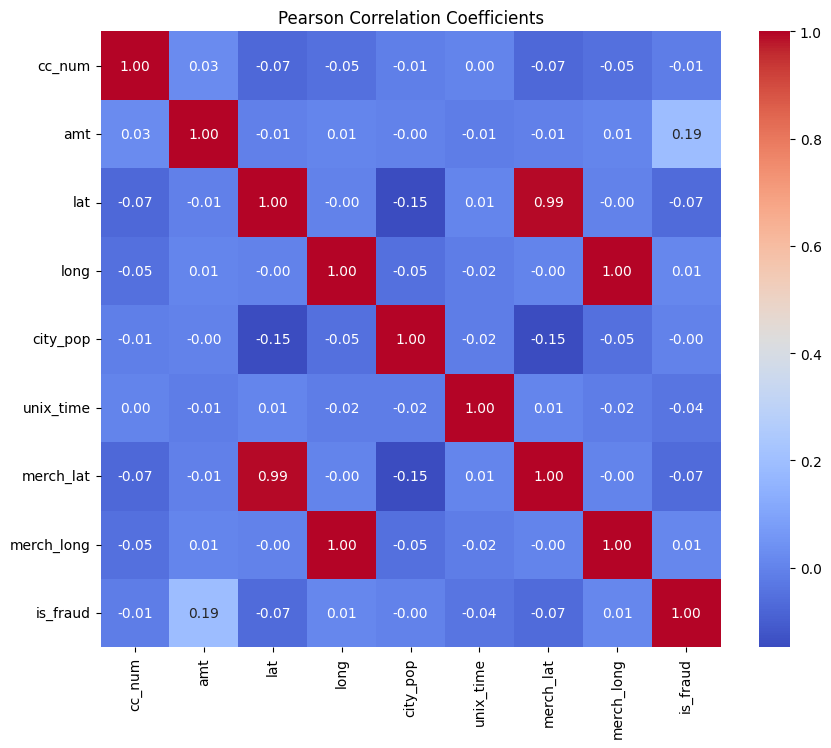

              cc_num       amt       lat      long  city_pop  unix_time  \
cc_num      1.000000  0.025745 -0.074132 -0.053575 -0.013467   0.000170   
amt         0.025745  1.000000 -0.006184  0.005600 -0.001221  -0.014624   
lat        -0.074132 -0.006184  1.000000 -0.001232 -0.148673   0.005949   
long       -0.053575  0.005600 -0.001232  1.000000 -0.053688  -0.015188   
city_pop   -0.013467 -0.001221 -0.148673 -0.053688  1.000000  -0.018420   
unix_time   0.000170 -0.014624  0.005949 -0.015188 -0.018420   1.000000   
merch_lat  -0.073979 -0.005499  0.993668 -0.000319 -0.148941   0.005782   
merch_long -0.053070  0.005469 -0.000920  0.999100 -0.053232  -0.015147   
is_fraud   -0.014648  0.189788 -0.067653  0.008322 -0.003899  -0.037823   

            merch_lat  merch_long  is_fraud  
cc_num      -0.073979   -0.053070 -0.014648  
amt         -0.005499    0.005469  0.189788  
lat          0.993668   -0.000920 -0.067653  
long        -0.000319    0.999100  0.008322  
city_pop    -0.1489

In [13]:
#Pearson Correlation Coefficients
# Select numeric columns
numeric_columns = ['cc_num', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
# Calculate Pearson correlation coefficients
correlation_matrix = df[numeric_columns].corr(method='pearson')
# Display the correlation matrix
print("Pearson Correlation Coefficients:")
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficients')
plt.show()
print(correlation_matrix)

In [22]:
# Check for missing values for each of the columns
missing_values = df.isnull().sum()
print("Missing values for each of the columns:")
print(missing_values)

Missing values for each of the columns:
id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
amt_scaled               0
city_pop_scaled          0
unix_time_scaled         0
trans_hour               0
trans_day                0
trans_month              0
dob_year                 0
dtype: int64


In [26]:
#Impute missing values
for column in df.columns:
    # Check if the column has missing values
    if df[column].isnull().any():
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Fill missing values with the mean of the column
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
        else:
            # Fill missing values with the mode of the column
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
# Check again for missing values after imputation
missing_values_after = df.isnull().sum()
# Print the number of missing values after imputation
print("Number of missing values after imputation:")
print(missing_values_after)

Number of missing values after imputation:
id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
amt_scaled               0
city_pop_scaled          0
unix_time_scaled         0
trans_hour               0
trans_day                0
trans_month              0
dob_year                 0
dtype: int64


In [31]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Iterate over each numeric column to check for outliers
numeric_columns = df.select_dtypes(include=['number']).columns
outliers_dict = {col: detect_outliers_iqr(df[col]) for col in numeric_columns if not detect_outliers_iqr(df[col]).empty}

# Print outliers for each numeric column
for col, outliers in outliers_dict.items():
    print(f"Outliers in column {col}:")
    print(outliers)
    print()

Outliers in column cc_num:
16      4.906630e+18
18      4.861310e+18
21      4.560000e+18
47      4.110270e+18
55      4.855490e+18
            ...     
9930    4.989850e+18
9952    4.210080e+18
9953    4.646850e+18
9961    4.044440e+18
9985    4.537000e+18
Name: cc_num, Length: 897, dtype: float64

Outliers in column amt:
33       210.36
71       189.99
100      242.35
133      558.03
167     1199.45
         ...   
9871     554.97
9890    2721.97
9910     188.38
9947     277.02
9954     365.72
Name: amt, Length: 514, dtype: float64

Outliers in column lat:
864     20.0271
2304    64.7556
2342    64.7556
2521    64.7556
3048    20.0827
3546    65.6899
3555    20.0271
3667    20.0827
3732    20.0271
3889    65.6899
4183    20.0827
4472    20.0827
4586    64.7556
5051    64.7556
5815    20.0827
6127    20.0271
6302    64.7556
6309    65.6899
7216    20.0827
7497    20.0271
7500    20.0827
7515    64.7556
7577    64.7556
7772    20.0827
7841    20.0271
7944    64.7556
8089    64.7556
816

In [28]:
# Check for duplicate rows
print(f"Number of duplicate rows in the DataFrame: {df.duplicated().sum()}")


Number of duplicate rows in the DataFrame: 0


In [32]:
#Encoding Script - Label Encoding , OneHot Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Load the dataset
data = df
# Define binary categorical column
binary_cat_column = 'gender'
# Apply Label Encoding for binary categorical column - gender
label_encoder = LabelEncoder()
data[binary_cat_column] = label_encoder.fit_transform(data[binary_cat_column])

# Define multi-class categorical columns
multi_cat_columns = ['merchant', 'category']

# Apply One-Hot Encoding for multi-class categorical columns - merchant, category
one_hot_encoder = OneHotEncoder()
encoded_cols = one_hot_encoder.fit_transform(data[multi_cat_columns]).toarray()

# Get the feature names after encoding
feature_names = one_hot_encoder.get_feature_names_out(multi_cat_columns)

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

# Replace original categorical columns with encoded ones
data = pd.concat([data.drop(multi_cat_columns, axis=1), encoded_df], axis=1)

# Print the encoded dataset
print(data.head())

   id trans_date_trans_time        cc_num    amt   first      last  gender  \
0   0      21/06/2020 12:14  2.291160e+15   2.86    Jeff   Elliott       1   
1   1      21/06/2020 12:14  3.573030e+15  29.84  Joanne  Williams       0   
2   2      21/06/2020 12:14  3.598220e+15  41.28  Ashley     Lopez       0   
3   3      21/06/2020 12:15  3.591920e+15  60.05   Brian  Williams       1   
4   4      21/06/2020 12:15  3.526830e+15   3.19  Nathan    Massey       1   

                        street        city state  ...  category_grocery_pos  \
0            351 Darlene Green    Columbia    SC  ...                   0.0   
1             3638 Marsh Union     Altonah    UT  ...                   0.0   
2         9333 Valentine Point    Bellmore    NY  ...                   0.0   
3  32941 Krystal Mill Apt. 552  Titusville    FL  ...                   0.0   
4     5783 Evan Roads Apt. 465    Falmouth    MI  ...                   0.0   

   category_health_fitness  category_home  category_kids

In [36]:
#Scaling features 
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numeric columns
scaled_features = scaler.fit_transform(df[['amt', 'city_pop', 'unix_time']])

# Update the DataFrame with scaled features
df[['amt_scaled', 'city_pop_scaled', 'unix_time_scaled']] = scaled_features

# Display the scaled DataFrame
print(df)

        id trans_date_trans_time        cc_num  \
0        0      21/06/2020 12:14  2.291160e+15   
1        1      21/06/2020 12:14  3.573030e+15   
2        2      21/06/2020 12:14  3.598220e+15   
3        3      21/06/2020 12:15  3.591920e+15   
4        4      21/06/2020 12:15  3.526830e+15   
...    ...                   ...           ...   
9995  9995      23/06/2020 23:57  4.998110e+15   
9996  9996      23/06/2020 23:57  6.761950e+11   
9997  9997      23/06/2020 23:57  4.585130e+12   
9998  9998      23/06/2020 23:58  2.131790e+14   
9999  9999      23/06/2020 23:58  3.027300e+13   

                                  merchant        category    amt   first  \
0                    fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                     fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2     fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                        fraud_Haley Group        misc_pos  60.05   Brian   
4             

In [37]:
## Data Discretization Script

# Load the dataset
data = df

# Select columns to discretize
numeric_columns = ['amt', 'city_pop']

# Define the number of bins for each column
n_bins = 4  # You can adjust this based on your requirements

# Initialize KBinsDiscretizer with subsample=None to disable subsampling
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform', subsample=None)

# Fit and transform the selected columns
discretized_data = kbins.fit_transform(data[numeric_columns])

# Create a DataFrame for the discretized data
discretized_df = pd.DataFrame(discretized_data, columns=[f'{col}_bin' for col in numeric_columns])

# Replace original columns with discretized ones
data = pd.concat([data.drop(columns=numeric_columns), discretized_df], axis=1)

# Print the first few rows of the updated dataset
print(data.head())


   id trans_date_trans_time        cc_num  \
0   0      21/06/2020 12:14  2.291160e+15   
1   1      21/06/2020 12:14  3.573030e+15   
2   2      21/06/2020 12:14  3.598220e+15   
3   3      21/06/2020 12:15  3.591920e+15   
4   4      21/06/2020 12:15  3.526830e+15   

                               merchant        category   first      last  \
0                 fraud_Kirlin and Sons   personal_care    Jeff   Elliott   
1                  fraud_Sporer-Keebler   personal_care  Joanne  Williams   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  Ashley     Lopez   
3                     fraud_Haley Group        misc_pos   Brian  Williams   
4                 fraud_Johnston-Casper          travel  Nathan    Massey   

   gender                       street        city  ...  \
0       1            351 Darlene Green    Columbia  ...   
1       0             3638 Marsh Union     Altonah  ...   
2       0         9333 Valentine Point    Bellmore  ...   
3       1  32941 Krystal Mill 

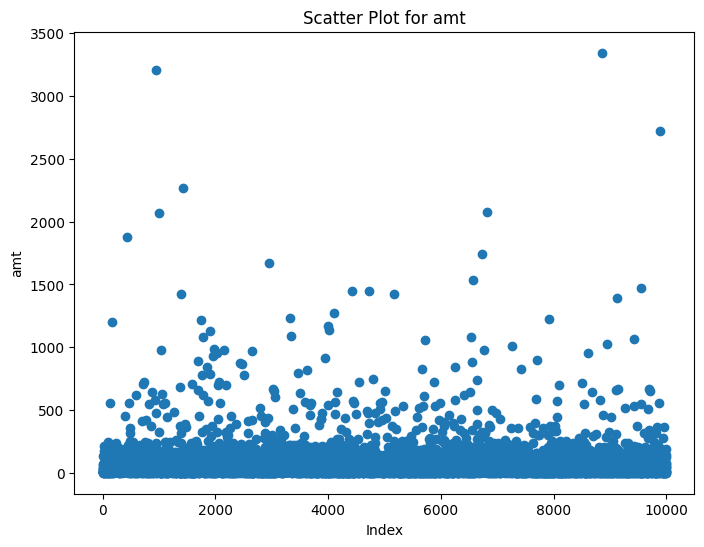

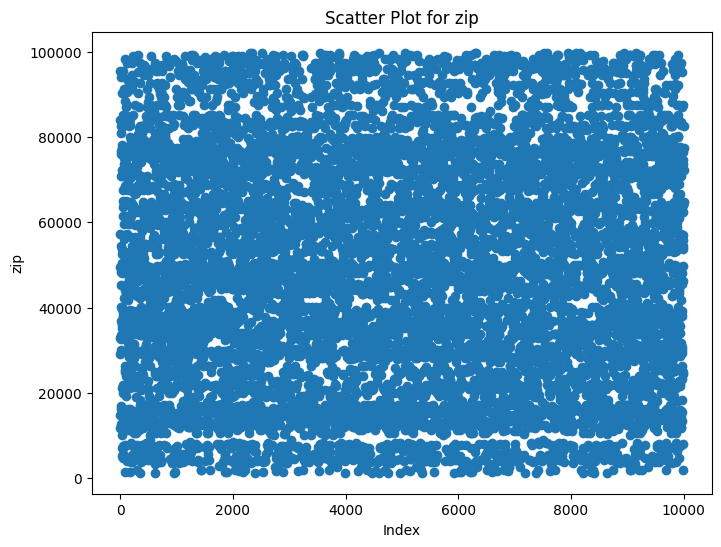

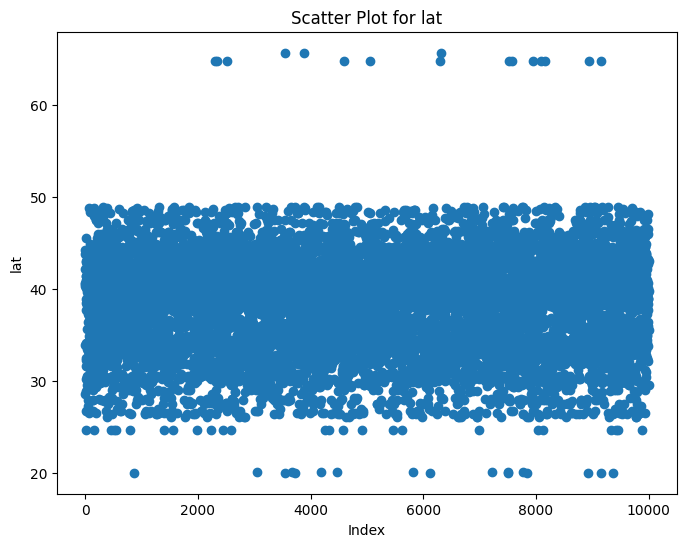

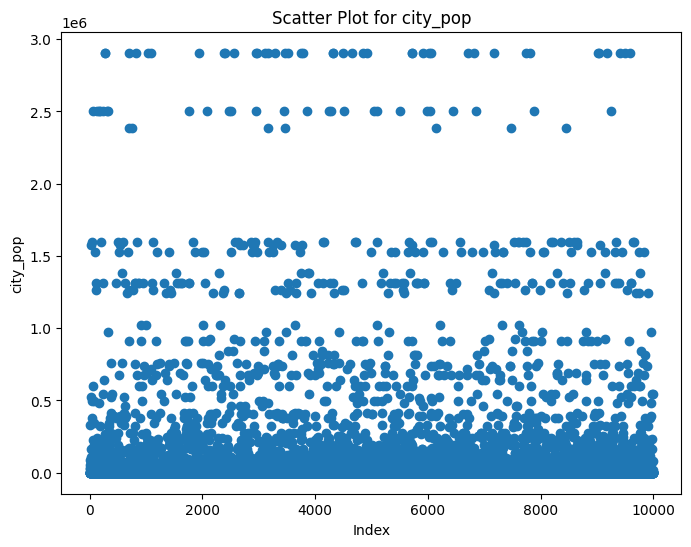

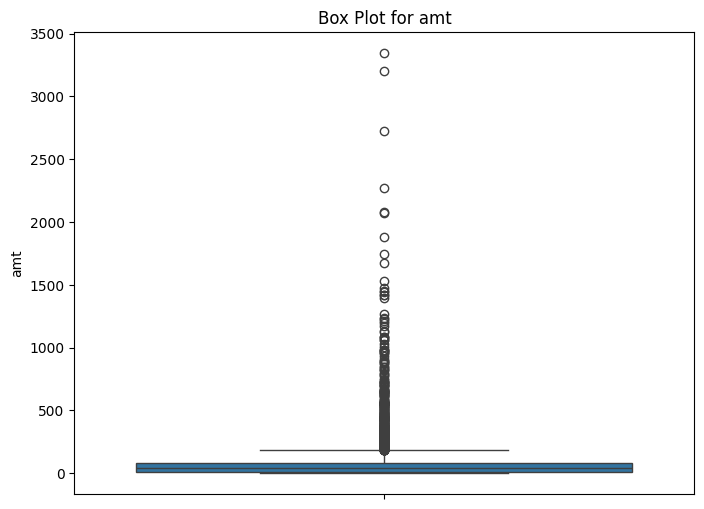

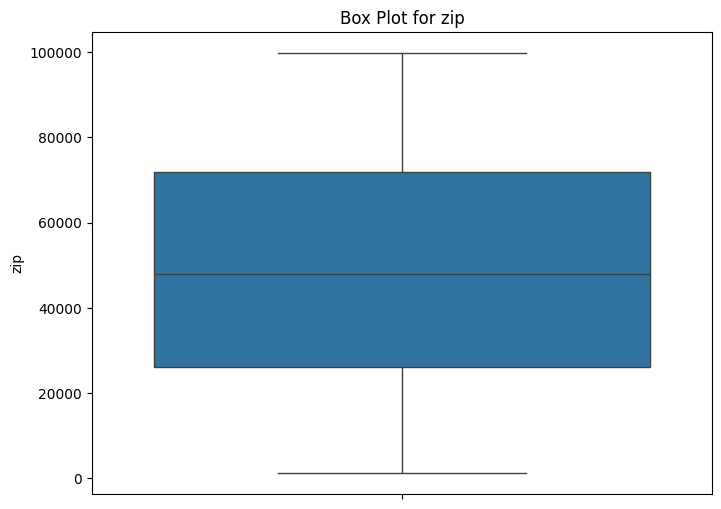

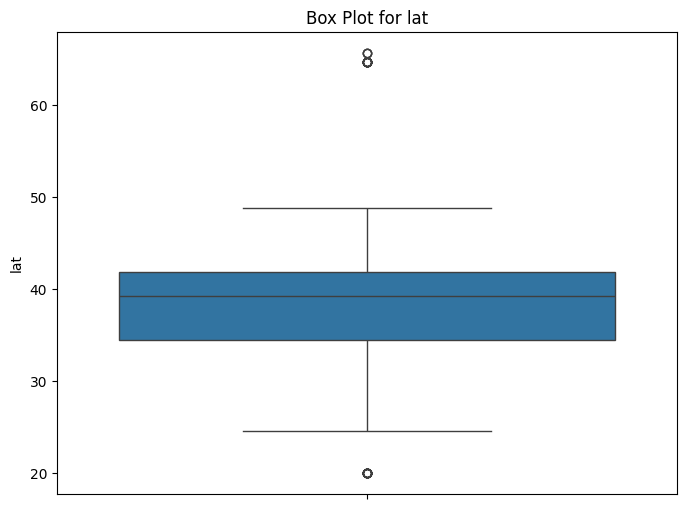

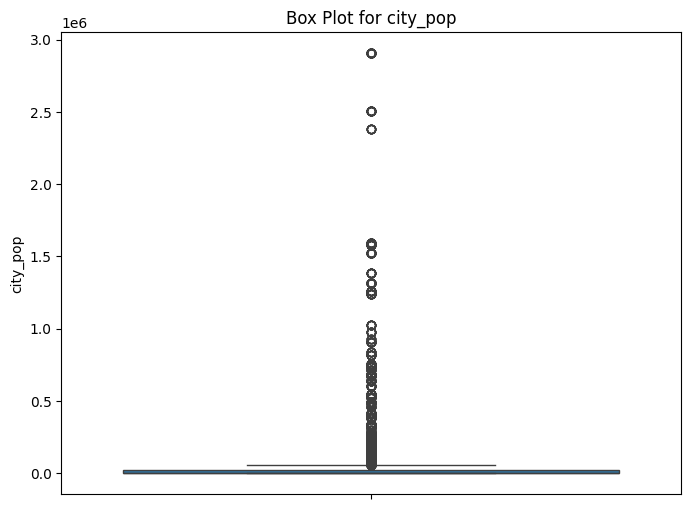

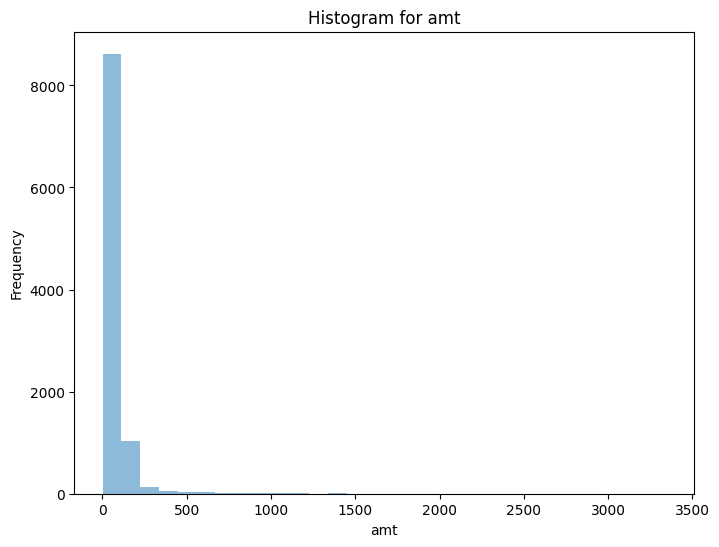

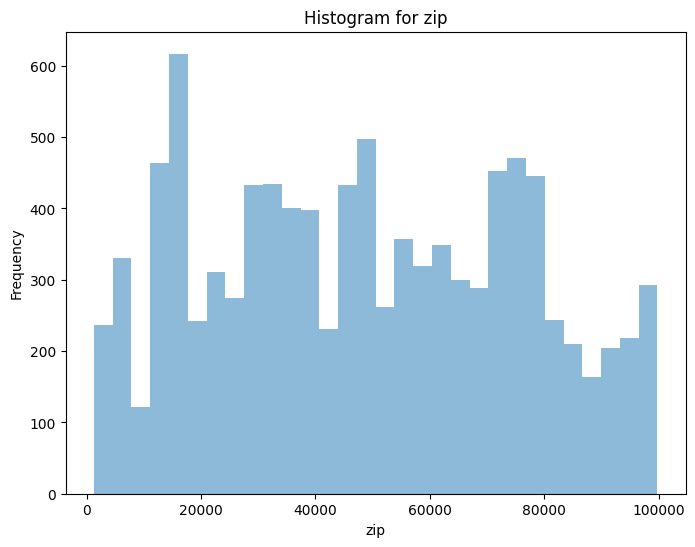

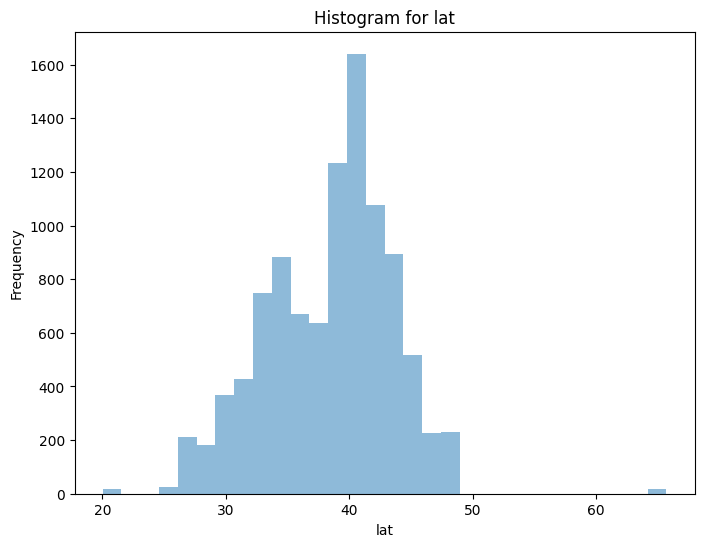

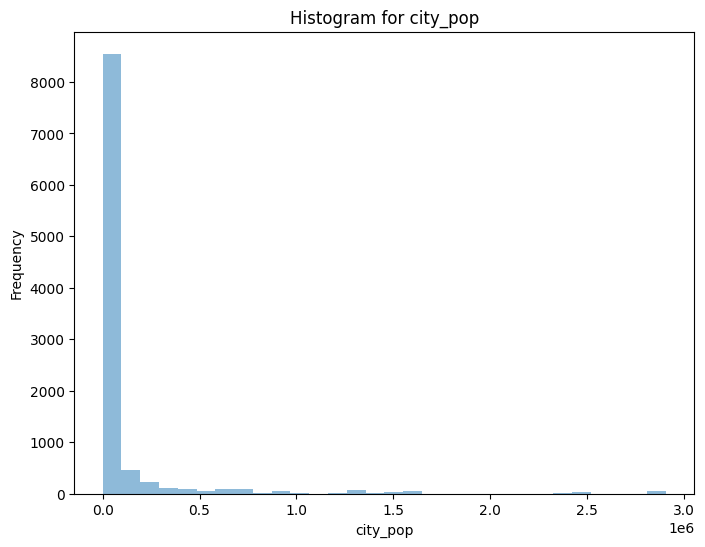

In [20]:
# Visualization for some of the attributes 
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting data for visualization
selected_attributes = ['amt', 'zip', 'lat', 'city_pop']

# Scatter Plots
for column in selected_attributes:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Scatter Plot for {column}')
    plt.show()

# Box Plots
for column in selected_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

# Histograms
for column in selected_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.show()


In [40]:
#Best 5 features script

# Load the dataset
data = df
# Preprocess the data
# Assuming 'trans_date_trans_time' and 'dob' are date/time columns that need to be converted
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
data['dob'] = pd.to_datetime(data['dob'], format='%d/%m/%Y')
# Extract relevant features from timestamp columns
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['dob_year'] = data['dob'].dt.year
# Encode categorical variables
encoder = LabelEncoder()
data['merchant'] = encoder.fit_transform(data['merchant'])
data['category'] = encoder.fit_transform(data['category'])
data['gender'] = encoder.fit_transform(data['gender'])
data['job'] = encoder.fit_transform(data['job'])

# Scale the data to ensure non-negative values
scaler = MinMaxScaler()
numeric_features = data.select_dtypes(include=['number']).columns.tolist()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Select only numeric features for feature selection
X = data[numeric_features].drop(['id', 'is_fraud', 'amt_scaled', 'unix_time_scaled'], axis=1)  # Exclude scaled columns
y = data['is_fraud']
# Select top 5 features using chi-squared test
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)
features_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
top_features = features_scores.nlargest(5, 'Score')
# Display the top 5 features
print(top_features)

      Feature      Score
3         amt  25.224538
15  trans_day   3.819073
10  unix_time   2.415897
0      cc_num   1.773026
6         lat   1.425518
